In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import yfinance as yf

from tensorflow.keras import Sequential

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

import pandas_datareader as pdr

In [2]:
# Retrieve Data
df = pdr.get_data_yahoo("ETH-USD")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-09,329.451996,307.056000,308.644989,320.884003,893249984,320.884003
2017-11-10,324.717987,294.541992,320.670990,299.252991,885985984,299.252991
2017-11-11,319.453003,298.191986,298.585999,314.681000,842300992,314.681000
2017-11-12,319.153015,298.513000,314.690002,307.907990,1613479936,307.907990
2017-11-13,328.415009,307.024994,307.024994,316.716003,1041889984,316.716003
...,...,...,...,...,...,...
2022-05-11,2441.079346,2018.855591,2342.754150,2072.108643,45743399154,2072.108643
2022-05-12,2170.458008,1748.303101,2072.504639,1961.701538,42463486402,1961.701538
2022-05-13,2139.713379,1941.975952,1960.122559,2014.418213,24816096567,2014.418213


In [3]:
df = df.drop(['Open','High','Low','Adj Close', 'Volume'], axis=1)

In [4]:
#pip install tensorflow

## Splitting train and test datasets 

* According to the number of days for prediction
* 30 days in our case

In [5]:
prediction_days = 30

df_train= df[:len(df)-prediction_days]
df_test= df[len(df)-prediction_days:]

## Scaling training set to fit the model

In [6]:
training_set = df_train.values
training_set = min_max_scaler.fit_transform(training_set)

x_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]

x_train = np.reshape(x_train, (len(x_train), 1, 1))

## Fit LSTM model / Training data

In [7]:
num_units = 4
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 10

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/10
324/324 [==============================] - 2s 2ms/step - loss: 0.0733
Epoch 2/10
324/324 [==============================] - 1s 2ms/step - loss: 0.0658
Epoch 3/10
324/324 [==============================] - 1s 2ms/step - loss: 0.0581
Epoch 4/10
324/324 [==============================] - 1s 2ms/step - loss: 0.0487
Epoch 5/10
324/324 [==============================] - 1s 2ms/step - loss: 0.0373
Epoch 6/10
324/324 [==============================] - 1s 2ms/step - loss: 0.0251
Epoch 7/10
324/324 [==============================] - 1s 2ms/step - loss: 0.0141
Epoch 8/10
324/324 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 9/10
324/324 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 10/10
324/324 [==============================] - 1s 2ms/step - loss: 8.1113e-04


## Predict values

In [8]:
test_set = df_test.values

inputs = test_set
inputs = min_max_scaler.transform(inputs)
#inputs = np.reshape(inputs)

predicted_price = regressor.predict(inputs)
predicted_price = min_max_scaler.inverse_transform(predicted_price)

## Visualising Actual x Predicted

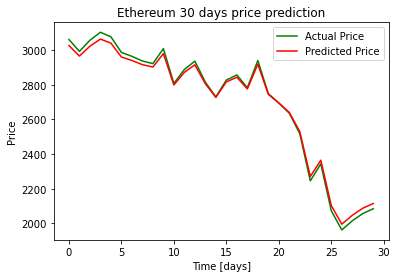

In [9]:
plt.plot(test_set, label="Actual Price", color='green')
plt.plot(predicted_price, label="Predicted Price", color='red')
 
plt.title('Ethereum 30 days price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

## Calculating accuracy using r2_Score and MAPE

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

In [11]:
# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test_set, predicted_price)}, index = [0])
evaluation_results['MAPE'] = np.mean(np.abs(predicted_price - test_set)
                                                               /np.abs(test_set))*100 
# Display the results
evaluation_results

,r2_score,MAPE
0,0.995585,0.801308
